In [1]:
## Data handling Libraries ###

import pandas as pd
import numpy as np

## Plotting Libraries ###
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Date Time ###
import datetime
import time
import pytz

### Warnings ###
import warnings
warnings.filterwarnings('ignore')

### Progress Bar ###
from tqdm import tqdm

### Model Building, Model Evaluvation, Model Preprocessing ###
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,RepeatedStratifiedKFold,StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold,RFECV

### Models Imbalance #

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ML MODELS #

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Scoring Dependancies #

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
# from sklearn.metrics import average_precision_score,make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, KFold
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# Models Saving #

import pickle

# Other #
from collections import Counter
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('../dataset/data_cleaning.csv')

In [19]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 1000)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29229 entries, 0 to 39801
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   homepage_url          29229 non-null  object 
 1   category_list         29229 non-null  object 
 2   market                29229 non-null  object 
 3   status                29229 non-null  object 
 4   country_code          29229 non-null  object 
 5   region                29229 non-null  object 
 6   funding_rounds        29229 non-null  float64
 7   founded_at            29229 non-null  object 
 8   founded_month         29229 non-null  object 
 9   founded_quarter       29229 non-null  object 
 10  founded_year          29229 non-null  float64
 11  first_funding_at      29229 non-null  object 
 12  last_funding_at       29229 non-null  object 
 13  seed                  29229 non-null  float64
 14  venture               29229 non-null  float64
 15  equity_crowdfunding

In [5]:
df.isnull().sum()

homepage_url            2278
category_list           2210
market                  2215
status                     0
country_code               0
region                     0
funding_rounds             0
founded_at              8361
founded_month           8427
founded_quarter         8427
founded_year            8427
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F                    0
round_G                    0
round_H                    0
f_SumCol                   0
dtype: int64

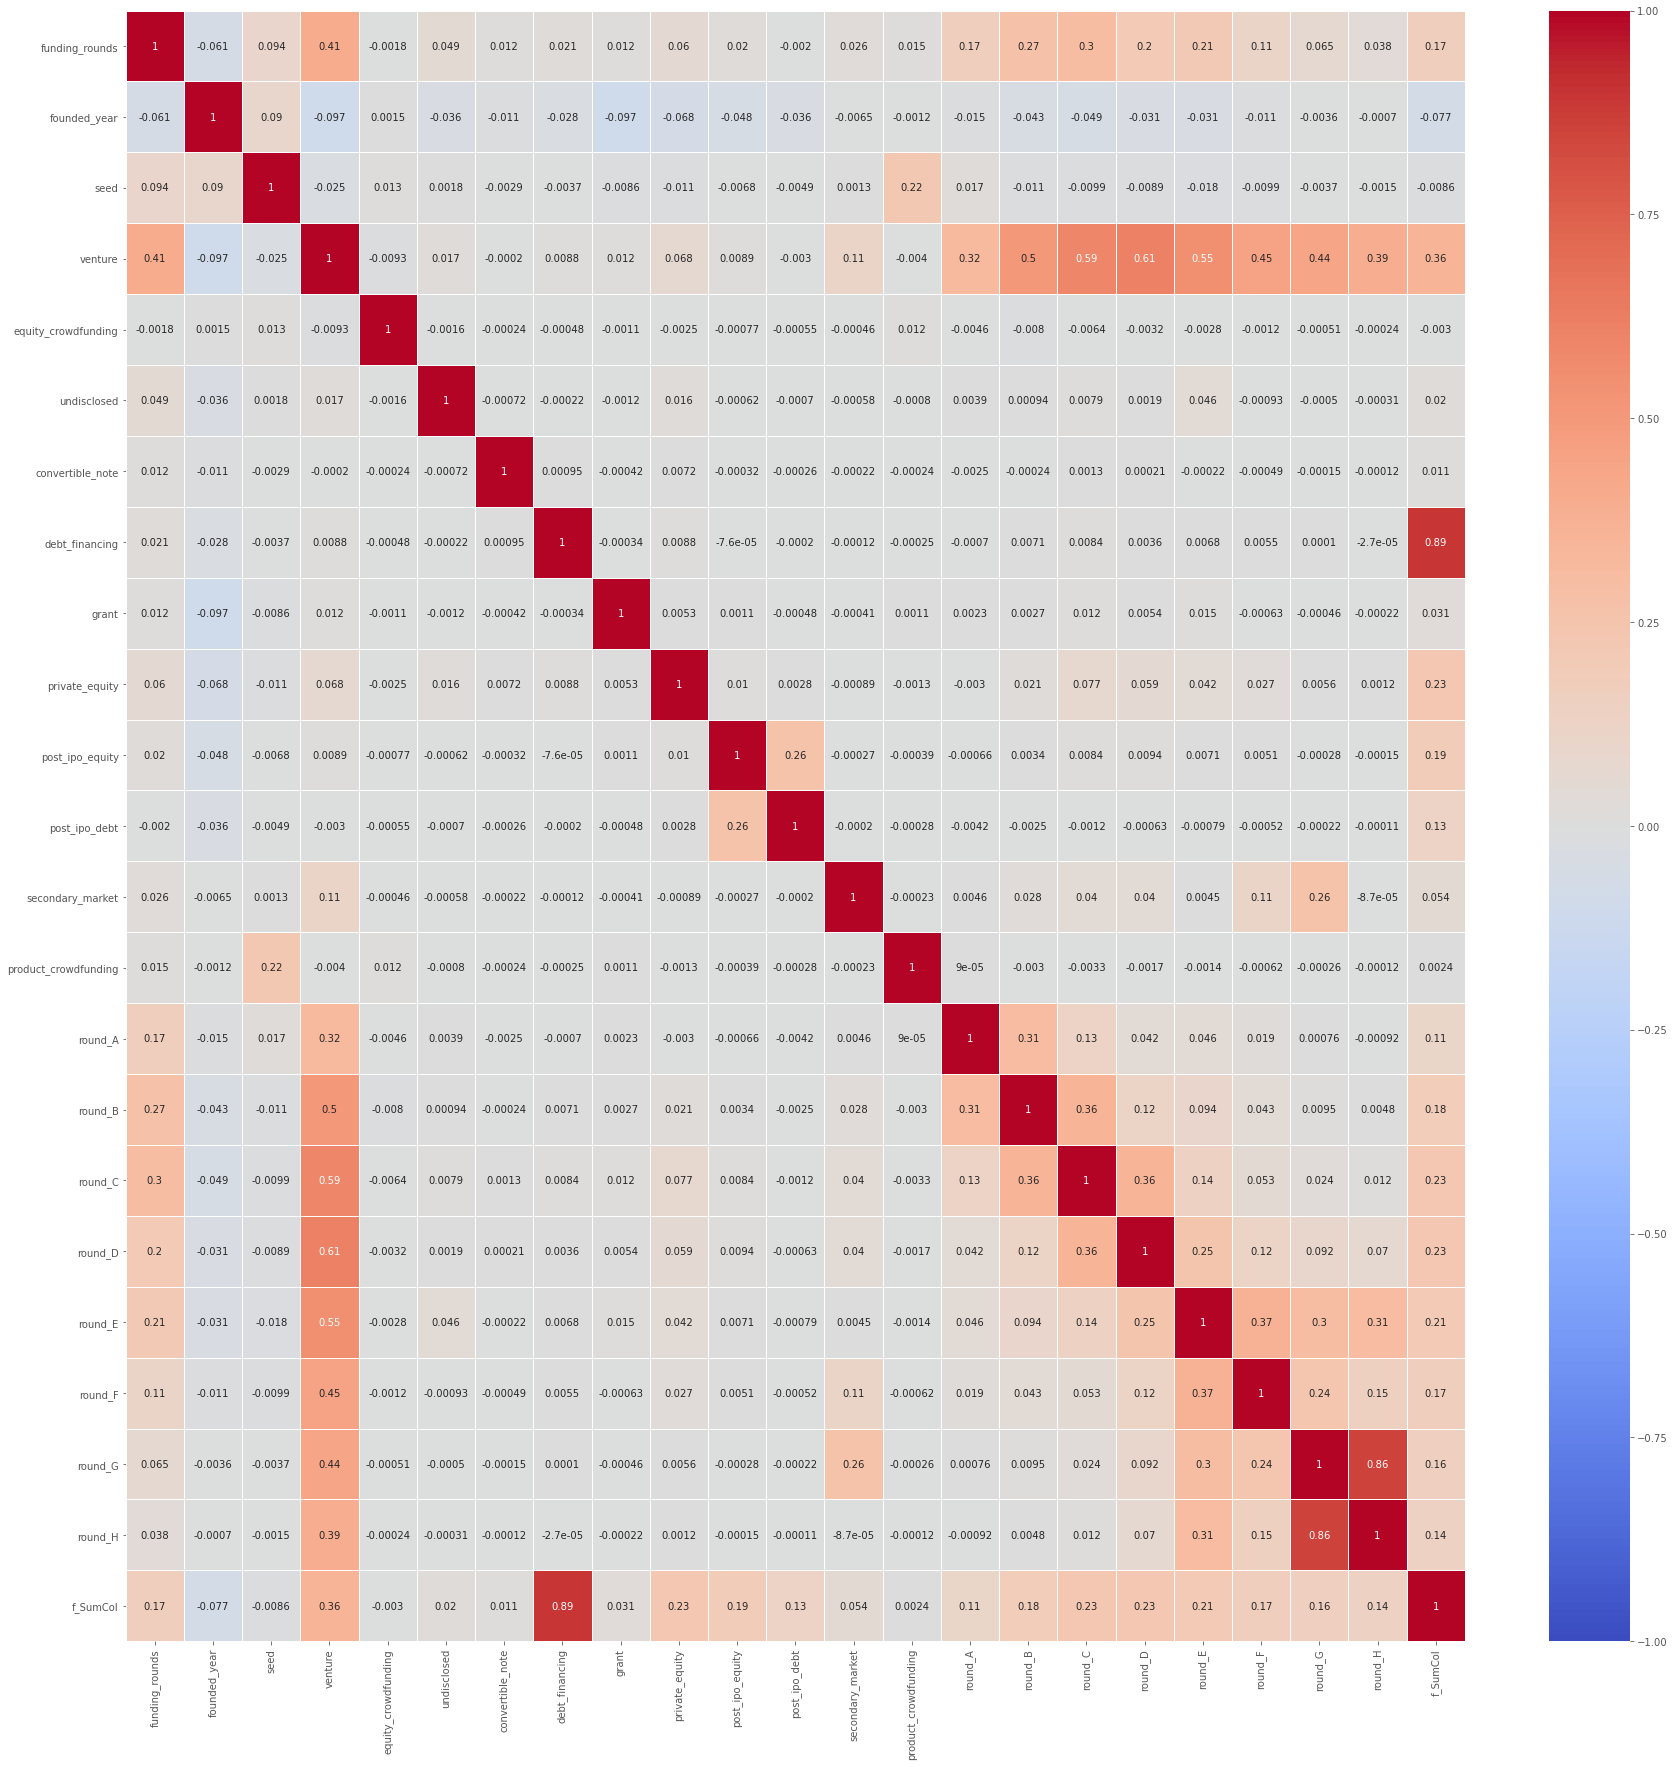

In [68]:
plt.figure(figsize=(30,30))
startup_heat = df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

In [8]:
df=df[(df['status']!='') &(df['country_code']!='') & (df['f_SumCol']!='-')&(df['f_SumCol']!='NaN')& (df['founded_year']!='') & (df['market']!='')]
df

,homepage_url,category_list,market,status,country_code,region,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,f_SumCol
0,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,acquired,USA,New York City,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
1,http://enjoyandtv.com,|Games|,Games,operating,USA,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0
2,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,operating,EST,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
3,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,operating,GBR,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0
4,NaN,|Tourism|Entertainment|Games|,Tourism,operating,USA,Dallas,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39797,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,operating,GBR,London,1.0,2013-01-28,2013-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0
39798,http://www.zznode.com,|Enterprise Software|,Enterprise Software,operating,CHN,Beijing,1.0,NaN,NaN,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3174602.0
39799,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,operating,HRV,Split,5.0,2012-05-13,2012-05,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97398.0
39800,http://www.alistgames.com,|Games|,Games,operating,Unknown,Unknown,1.0,NaN,NaN,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9300000.0


In [13]:
df.dropna(inplace = True)

In [14]:
world_datamart = df
world_datamart = world_datamart[['market','f_SumCol','status','country_code','founded_year','venture','seed']]
world_datamart.columns=['Sector','Funding','Status','Country','Found_Year','Venture','Angel']
world_datamart['Venture']=world_datamart['Venture'].astype(float)
world_datamart['Angel']=world_datamart['Angel'].astype(float)
world_datamart['Found_Year']= world_datamart['Found_Year'].astype(int)
world_datamart

,Sector,Funding,Status,Country,Found_Year,Venture,Angel
0,News,1750000.0,acquired,USA,2012,0.0,1750000.0
2,Publishing,40000.0,operating,EST,2012,0.0,40000.0
3,Electronics,1500000.0,operating,GBR,2011,0.0,1500000.0
6,Curated Web,4000000.0,operating,Unknown,2007,2000000.0,0.0
8,E-Commerce,40000.0,operating,CHL,2012,0.0,40000.0
...,...,...,...,...,...,...,...
39794,Biotechnology,21404061.0,closed,MYS,1994,7991547.0,2007363.0
39796,Biotechnology,5373200.0,operating,AUT,2007,2686600.0,0.0
39797,Education,320000.0,operating,GBR,2013,0.0,320000.0
39799,Web Development,97398.0,operating,HRV,2012,0.0,71525.0


## Closed Business Per Sector

In [17]:
world_datamart_close =world_datamart[world_datamart['Status']=='closed']
world_datamart_close
world_status_dat =world_datamart_close[['Sector','Status']]
world_status_dat_view =world_status_dat.groupby(['Sector'])['Status'].agg(['count'])
world_status_dat_view.sort_values(by=['count'],ascending=False)

,count
Sector,
Software,171
Curated Web,146
Mobile,99
Biotechnology,71
Social Media,70
Games,68
E-Commerce,65
Advertising,54
Clean Technology,42


## Acquired Business Per Sector

In [20]:
world_datamart_acquired =world_datamart[world_datamart['Status']=='acquired']
world_datamart_acquired
world_status_dat =world_datamart_acquired[['Sector','Status']]
world_status_dat_view =world_status_dat.groupby(['Sector'])['Status'].agg(['count'])
world_status_dat_view.sort_values(by=['count'],ascending=False)

,count
Sector,
Software,327
Enterprise Software,146
Mobile,145
Curated Web,114
Biotechnology,99
Advertising,98
Games,75
E-Commerce,67
Semiconductors,63


## Sum Angel by Sector

In [21]:
world_datamart_Angel =world_datamart[world_datamart['Angel']>0]
world_datamart_Angel
world_status_dat =world_datamart_Angel[['Sector','Angel']]
world_status_dat_view =world_status_dat.groupby(['Sector'])['Angel'].agg(['sum'])
world_status_dat_view.sort_values(by=['sum'],ascending=False).style.format({'sum':'${0:,.2f}'})

,sum
Sector,
Software,"$939,047,901.00"
Mobile,"$682,417,786.00"
E-Commerce,"$533,201,109.00"
Curated Web,"$528,759,132.00"
Advertising,"$312,413,073.00"
Biotechnology,"$290,807,888.00"
Enterprise Software,"$257,688,936.00"
Social Media,"$243,182,408.00"
Games,"$230,116,160.00"


## Sum Sectore by Venture

In [22]:
world_datamart_venture =world_datamart[world_datamart['Venture']>0]
world_datamart_venture
world_status_dat =world_datamart_venture[['Sector','Venture']]
world_status_dat_view =world_status_dat.groupby(['Sector'])['Venture'].agg(['sum'])
world_status_dat_view.sort_values(by=['sum'],ascending=False).style.format({'sum':'${0:,.2f}'})

,sum
Sector,
Biotechnology,"$34,588,786,789.00"
Software,"$23,935,658,481.00"
Clean Technology,"$15,171,294,421.00"
Health Care,"$14,393,305,206.00"
E-Commerce,"$12,433,060,919.00"
Enterprise Software,"$12,198,117,991.00"
Mobile,"$11,169,152,526.00"
Advertising,"$9,369,280,618.00"
Semiconductors,"$7,905,129,868.00"


## Company Aged 

In [24]:
world_datamart_Age = world_datamart
world_datamart_Age['Age']=2021-world_datamart['Found_Year']
world_datamart_Age

,Sector,Funding,Status,Country,Found_Year,Venture,Angel,Age
0,News,1750000.0,acquired,USA,2012,0.0,1750000.0,9
2,Publishing,40000.0,operating,EST,2012,0.0,40000.0,9
3,Electronics,1500000.0,operating,GBR,2011,0.0,1500000.0,10
6,Curated Web,4000000.0,operating,Unknown,2007,2000000.0,0.0,14
8,E-Commerce,40000.0,operating,CHL,2012,0.0,40000.0,9
...,...,...,...,...,...,...,...,...
39794,Biotechnology,21404061.0,closed,MYS,1994,7991547.0,2007363.0,27
39796,Biotechnology,5373200.0,operating,AUT,2007,2686600.0,0.0,14
39797,Education,320000.0,operating,GBR,2013,0.0,320000.0,8
39799,Web Development,97398.0,operating,HRV,2012,0.0,71525.0,9


## Number of Companies group by 110 Country

In [29]:
#Number of Companies group by 110 Country 
world_com = df[['country_code']]
world_com.columns = ['country']
world_com.value_counts()

country
USA        18297
Unknown     1986
GBR         1622
CAN          836
FRA          546
IND          496
CHN          492
ISR          489
DEU          468
ESP          353
IRL          206
AUS          192
SGP          186
SWE          185
ITA          180
NLD          174
KOR          160
JPN          157
BRA          152
RUS          149
CHL          148
FIN          135
CHE          131
ARG          111
DNK          105
BEL           95
HKG           79
TUR           74
AUT           62
NOR           60
POL           53
BGR           49
MEX           47
ARE           45
NZL           40
MYS           37
PRT           36
EST           35
CZE           30
UKR           29
ZAF           29
HUN           25
THA           25
GRC           25
IDN           25
COL           22
TWN           21
ROM           21
PHL           20
LTU           18
PER           15
ISL           15
NGA           14
EGY           14
LUX           14
JOR           13
KEN           13
SVN           11
PAK   

## Number of Thai Companies

In [31]:
#Number of Thai Companies
thai_com = df[['country_code']]
thai_com.columns = ['country']
thai_com = thai_com['country'].str.contains('THA')
thai_com.sum()

25

In [32]:
sea_com=world_com[world_com['country'].str.contains('IDN|KHM|THA|PHL|BRN|VNM|TLS|SGP|MYS|MMR')]
sea_com.value_counts()

country
SGP        186
MYS         37
IDN         25
THA         25
PHL         20
VNM          6
KHM          2
MMR          2
dtype: int64

In [37]:
tha_o_dat=df[(df['country_code']!='') & ( df['f_SumCol']!='-') & (df['market']!='')&(df['country_code']=='THA')]
tha_dat =tha_o_dat[['market','f_SumCol']]
tha_dat['f_SumCol'] = tha_dat['f_SumCol'].str.replace(',', '')
tha_dat['f_SumCol'] = tha_dat['f_SumCol'].str.replace('$', '')
tha_dat['f_SumCol'] = tha_dat['f_SumCol'].astype(float)
tha_dat_view=tha_dat.groupby('market')['f_SumCol'].agg(['sum','count','mean','min','max'])
tha_dat_view.sort_values(by=['sum','count','mean'],ascending=False).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
E-Commerce,"$29,102,414.00",4,"$7,275,603.50","$2,414.00","$24,500,000.00"
Advertising,"$12,500,000.00",1,"$12,500,000.00","$12,500,000.00","$12,500,000.00"
Software,"$6,410,000.00",4,"$1,602,500.00","$50,000.00","$6,000,000.00"
Public Relations,"$4,510,000.00",1,"$4,510,000.00","$4,510,000.00","$4,510,000.00"
Shopping,"$3,000,000.00",1,"$3,000,000.00","$3,000,000.00","$3,000,000.00"
Web Hosting,"$2,200,000.00",1,"$2,200,000.00","$2,200,000.00","$2,200,000.00"
Social Media Monitoring,"$1,864,000.00",1,"$1,864,000.00","$1,864,000.00","$1,864,000.00"
Reviews and Recommendations,"$1,600,500.00",1,"$1,600,500.00","$1,600,500.00","$1,600,500.00"
Consumers,"$1,000,000.00",1,"$1,000,000.00","$1,000,000.00","$1,000,000.00"


In [38]:

world_dat_view=world_dat.groupby('market')['f_SumCol'].agg(['sum','count','mean','min','max'])
world_dat_view.sort_values(by=['sum','count','mean'],ascending=False).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
Biotechnology,"$75,155,984,898.00","2,092","$35,925,422.99",$0.00,"$2,400,000,000.00"
Mobile,"$53,885,178,781.00","1,338","$40,272,928.83",$0.00,"$30,079,503,000.00"
Software,"$50,632,249,844.00","3,085","$16,412,398.65",$0.00,"$1,920,333,022.00"
Clean Technology,"$37,238,615,092.00",644,"$57,823,936.48",$0.00,"$1,700,000,000.00"
Health Care,"$32,001,642,649.00",782,"$40,922,816.69",$0.00,"$620,000,000.00"
E-Commerce,"$29,095,049,967.00","1,103","$26,378,105.14",$0.00,"$1,742,725,004.00"
Enterprise Software,"$26,868,433,171.00",916,"$29,332,350.62",$0.00,"$2,000,000,000.00"
Advertising,"$18,421,895,024.00",734,"$25,097,949.62",$0.00,"$2,255,800,000.00"
Semiconductors,"$15,296,245,483.00",306,"$49,987,730.34",$0.00,"$427,700,000.00"


## Word Startup Companies

In [39]:
world_dat_view = world_dat_view[world_dat_view['count']>2]
world_dat_view.sort_values(by=['count','sum','mean'],ascending=False).head(10).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
Software,"$50,632,249,844.00","3,085","$16,412,398.65",$0.00,"$1,920,333,022.00"
Biotechnology,"$75,155,984,898.00","2,092","$35,925,422.99",$0.00,"$2,400,000,000.00"
Mobile,"$53,885,178,781.00","1,338","$40,272,928.83",$0.00,"$30,079,503,000.00"
E-Commerce,"$29,095,049,967.00","1,103","$26,378,105.14",$0.00,"$1,742,725,004.00"
Curated Web,"$12,078,387,795.00","1,063","$11,362,547.31",$0.00,"$1,524,000,000.00"
Enterprise Software,"$26,868,433,171.00",916,"$29,332,350.62",$0.00,"$2,000,000,000.00"
Health Care,"$32,001,642,649.00",782,"$40,922,816.69",$0.00,"$620,000,000.00"
Advertising,"$18,421,895,024.00",734,"$25,097,949.62",$0.00,"$2,255,800,000.00"
Hardware + Software,"$14,451,883,840.00",723,"$19,988,774.33",$0.00,"$1,100,000,000.00"


<AxesSubplot:xlabel='market'>

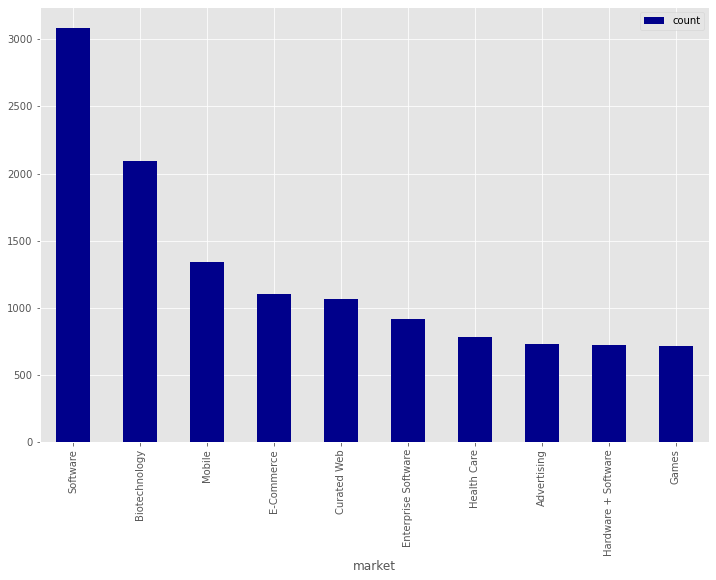

In [41]:
#World Top 10 Market Sectors by number of companies
world_dat_view.sort_values(by=['count'],ascending=False).head(10).plot.bar(y='count', color = 'darkblue')

## Word Startup Investments

In [42]:
world_dat_view.sort_values(by=['sum','count','mean'],ascending=False).head(10).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
Biotechnology,"$75,155,984,898.00","2,092","$35,925,422.99",$0.00,"$2,400,000,000.00"
Mobile,"$53,885,178,781.00","1,338","$40,272,928.83",$0.00,"$30,079,503,000.00"
Software,"$50,632,249,844.00","3,085","$16,412,398.65",$0.00,"$1,920,333,022.00"
Clean Technology,"$37,238,615,092.00",644,"$57,823,936.48",$0.00,"$1,700,000,000.00"
Health Care,"$32,001,642,649.00",782,"$40,922,816.69",$0.00,"$620,000,000.00"
E-Commerce,"$29,095,049,967.00","1,103","$26,378,105.14",$0.00,"$1,742,725,004.00"
Enterprise Software,"$26,868,433,171.00",916,"$29,332,350.62",$0.00,"$2,000,000,000.00"
Advertising,"$18,421,895,024.00",734,"$25,097,949.62",$0.00,"$2,255,800,000.00"
Semiconductors,"$15,296,245,483.00",306,"$49,987,730.34",$0.00,"$427,700,000.00"


<AxesSubplot:xlabel='market'>

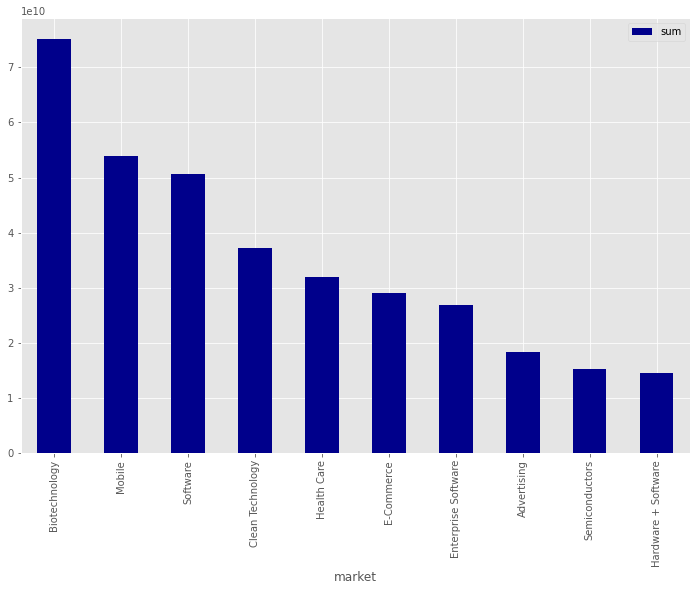

In [45]:
#World Top 10 Market Sectors In Term of Highest Marketing Funding
world_dat_view.sort_values(by=['sum'],ascending=False).head(10).plot.bar(y='sum', color = 'darkblue')

<AxesSubplot:xlabel='market'>

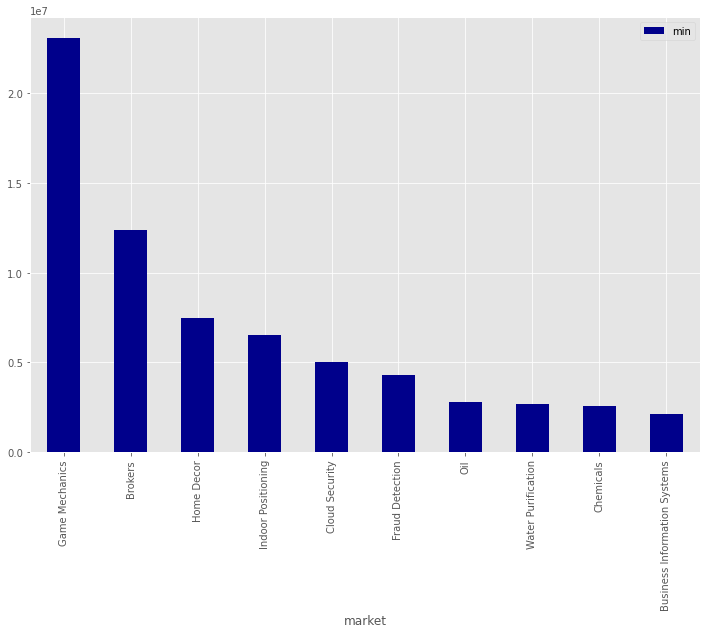

In [46]:
#World Top 10 Market Sectors In Term of Highest minmum amount of Marketing Funding 
world_dat_view.sort_values(by=['min'],ascending=False).head(10).plot.bar(y='min', color = 'darkblue')

<AxesSubplot:xlabel='market'>

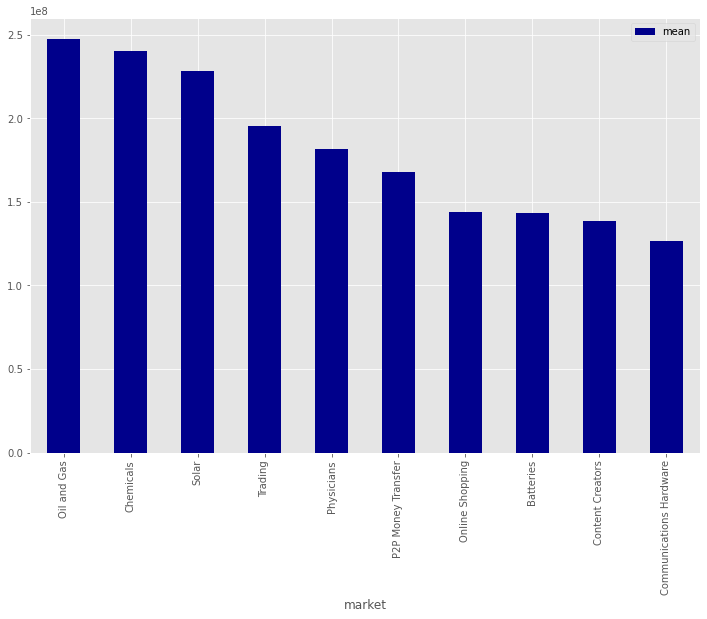

In [47]:
#World Top 10 Market Sectors In Term of Highest average amount of Marketing Funding 
world_dat_view.sort_values(by=['mean'],ascending=False).head(10).plot.bar(y='mean', color = 'darkblue')

## ASEAN

In [51]:
sea_o_dat =df[df['country_code'].str.contains('IDN|KHM|THA|PHL|BRN|VNM|TLS|SGP|MYS|MMR')]
sea_dat =sea_o_dat[['market','f_SumCol']]
sea_dat['f_SumCol'] = sea_dat['f_SumCol'].astype(int)
sea_dat_view=sea_dat.groupby('market')['f_SumCol'].agg(['sum','count','mean','min','max'])
sea_dat_view.sort_values(by=['sum','count','mean'],ascending=False).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
E-Commerce,"$2,092,766,065.00",28,"$74,741,645.18","$2,414.00","$1,370,202,318.00"
Mobile,"$489,519,285.00",22,"$22,250,876.59",$0.00,"$190,000,000.00"
Biotechnology,"$293,304,061.00",6,"$48,884,010.17","$4,000,000.00","$143,500,000.00"
Manufacturing,"$255,000,000.00",3,"$85,000,000.00","$46,000,000.00","$128,000,000.00"
Travel,"$231,085,000.00",10,"$23,108,500.00",$0.00,"$160,000,000.00"
Semiconductors,"$216,000,000.00",3,"$72,000,000.00",$0.00,"$186,000,000.00"
Games,"$202,678,700.00",8,"$25,334,837.50","$52,700.00","$188,000,000.00"
Marketplaces,"$201,050,000.00",5,"$40,210,000.00","$10,000.00","$200,000,000.00"
Networking,"$124,114,000.00",3,"$41,371,333.33",$0.00,"$93,900,000.00"


In [53]:
sea_dat_view=sea_dat.groupby('market')['f_SumCol'].agg(['sum','count','mean','min','max'])
sea_dat_view = sea_dat_view[sea_dat_view['count']>2]
sea_dat_view.sort_values(by=['count','sum','mean'],ascending=False).head(10).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
E-Commerce,"$2,092,766,065.00",28,"$74,741,645.18","$2,414.00","$1,370,202,318.00"
Mobile,"$489,519,285.00",22,"$22,250,876.59",$0.00,"$190,000,000.00"
Software,"$19,655,365.00",19,"$1,034,492.89","$5,000.00","$6,000,000.00"
Curated Web,"$39,203,999.00",13,"$3,015,692.23",$0.00,"$12,800,000.00"
Travel,"$231,085,000.00",10,"$23,108,500.00",$0.00,"$160,000,000.00"
Games,"$202,678,700.00",8,"$25,334,837.50","$52,700.00","$188,000,000.00"
Social Media,"$96,567,000.00",8,"$12,070,875.00","$40,000.00","$78,000,000.00"
Consumers,"$81,321,500.00",8,"$10,165,187.50","$91,500.00","$51,400,000.00"
Biotechnology,"$293,304,061.00",6,"$48,884,010.17","$4,000,000.00","$143,500,000.00"


<AxesSubplot:xlabel='market'>

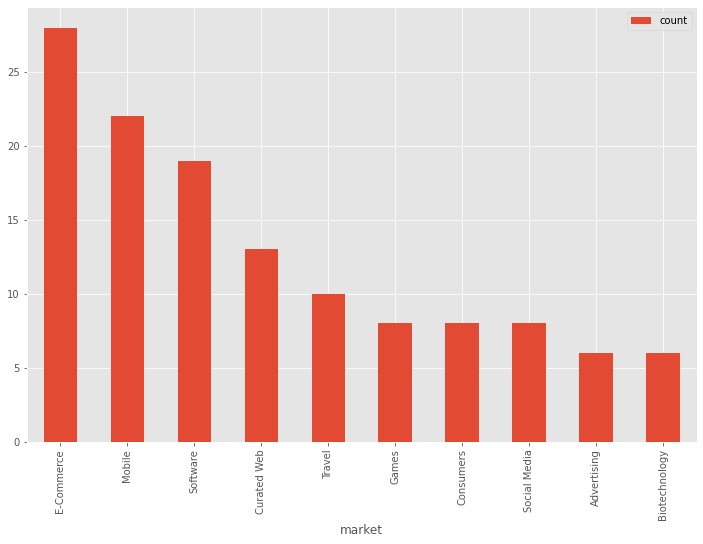

In [54]:
#ASEAN Top 10 Market Sectors by Number of companies
sea_dat_view.sort_values(by=['count'],ascending=False).head(10).plot.bar(y='count')

In [56]:
#Asean Startup Investments
sea_dat_view.sort_values(by=['sum','count','mean'],ascending=False).head(10).style.format({'mean':'${0:,.2f}','count':'{0:,.0f}','sum':'${0:,.2f}','min':'${0:,.2f}','max':'${0:,.2f}'})

,sum,count,mean,min,max
market,,,,,
E-Commerce,"$2,092,766,065.00",28,"$74,741,645.18","$2,414.00","$1,370,202,318.00"
Mobile,"$489,519,285.00",22,"$22,250,876.59",$0.00,"$190,000,000.00"
Biotechnology,"$293,304,061.00",6,"$48,884,010.17","$4,000,000.00","$143,500,000.00"
Manufacturing,"$255,000,000.00",3,"$85,000,000.00","$46,000,000.00","$128,000,000.00"
Travel,"$231,085,000.00",10,"$23,108,500.00",$0.00,"$160,000,000.00"
Semiconductors,"$216,000,000.00",3,"$72,000,000.00",$0.00,"$186,000,000.00"
Games,"$202,678,700.00",8,"$25,334,837.50","$52,700.00","$188,000,000.00"
Marketplaces,"$201,050,000.00",5,"$40,210,000.00","$10,000.00","$200,000,000.00"
Networking,"$124,114,000.00",3,"$41,371,333.33",$0.00,"$93,900,000.00"


<AxesSubplot:xlabel='market'>

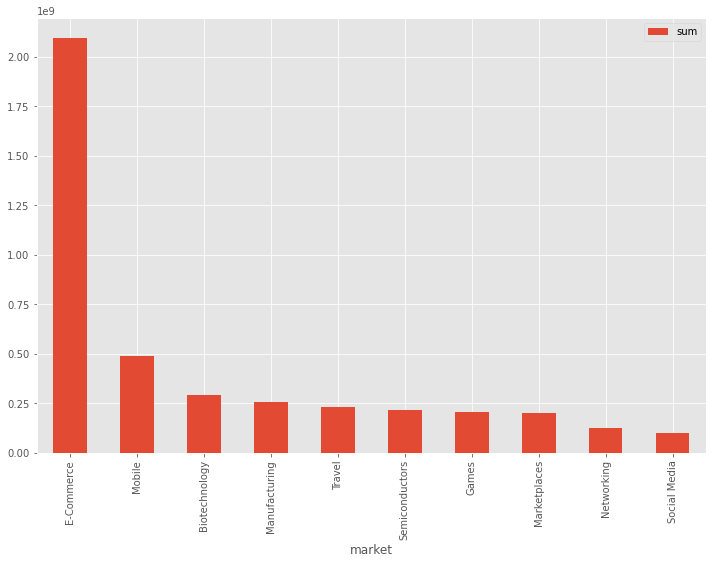

In [57]:
#ASEAN Top 10 Market Sectors In Term of Highest Marketing Funding
sea_dat_view.sort_values(by=['sum'],ascending=False).head(10).plot.bar(y='sum')

<AxesSubplot:xlabel='market'>

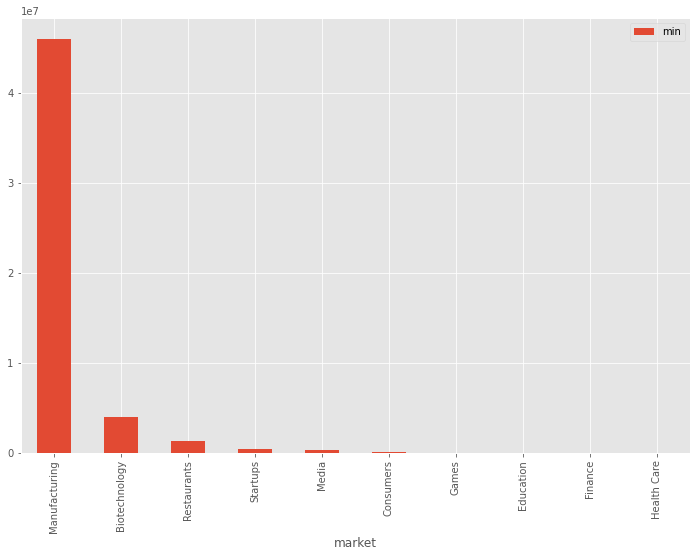

In [58]:
#ASEAN Top 10 Market Sectors In Term of Highest minmum amount of Marketing Funding 
sea_dat_view.sort_values(by=['min'],ascending=False).head(10).plot.bar(y='min')

<AxesSubplot:xlabel='market'>

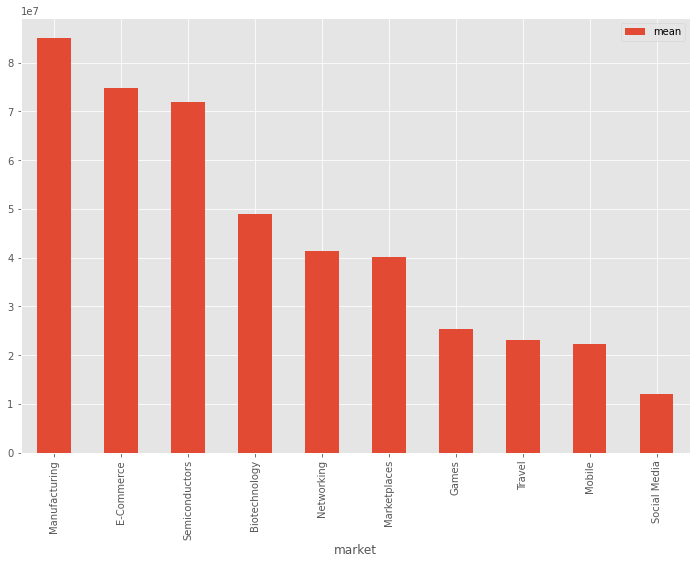

In [59]:
#ASEAN Top 10 Market Sectors In Term of Highest average amount of Marketing Funding 
sea_dat_view.sort_values(by=['mean'],ascending=False).head(10).plot.bar(y='mean')

## Word Startup Status

In [60]:
world_status_dat =df
QMarket=['Software','Biotechnology','Mobile','Clean Technology','Health Care']
world_status_dat = world_status_dat[world_status_dat['market'].isin(QMarket)]
world_status_dat =world_status_dat[['market','status']]
world_status_dat_view =world_status_dat.groupby(['market','status'])['status'].count()
world_status_dat_view

market            status   
Biotechnology     acquired       99
                  closed         71
                  operating    1922
Clean Technology  acquired       33
                  closed         42
                  operating     569
Health Care       acquired       43
                  closed         26
                  operating     713
Mobile            acquired      145
                  closed         99
                  operating    1094
Software          acquired      327
                  closed        171
                  operating    2587
Name: status, dtype: int64

## ASEAN Startup Status

In [61]:
sea_status_dat =sea_o_dat
QMarket=['E-Commerce','Mobile','Biotechnology','Manufacturing','Clean Technology']
sea_status_dat = sea_status_dat[sea_status_dat['market'].isin(QMarket)]
sea_status_dat =sea_status_dat[['market','status']]
sea_status_dat_view =sea_status_dat.groupby(['market','status'])['status'].count()
sea_status_dat_view

market            status   
Biotechnology     closed        2
                  operating     4
Clean Technology  operating     1
E-Commerce        acquired      1
                  closed        3
                  operating    24
Manufacturing     operating     3
Mobile            operating    22
Name: status, dtype: int64

### TOP 10 World Startup Investments

<AxesSubplot:xlabel='market'>

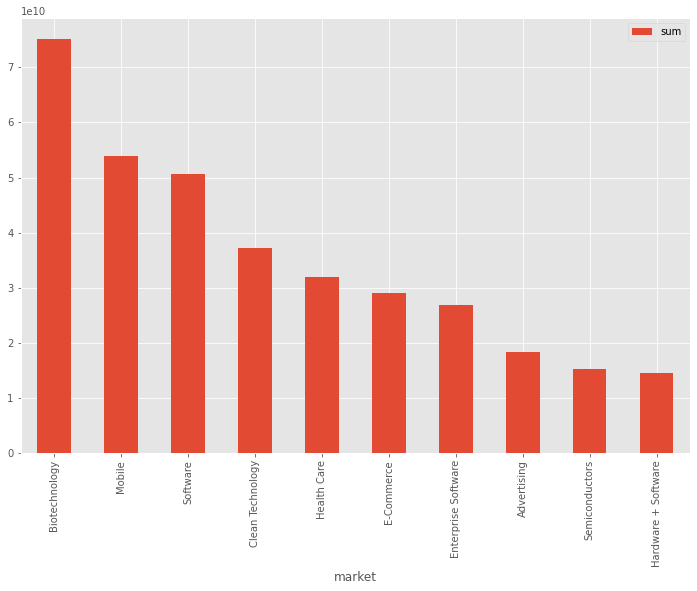

In [64]:
world_dat_view.sort_values(by=['sum'],ascending=False).head(10).plot.bar(y='sum')

<AxesSubplot:xlabel='market'>

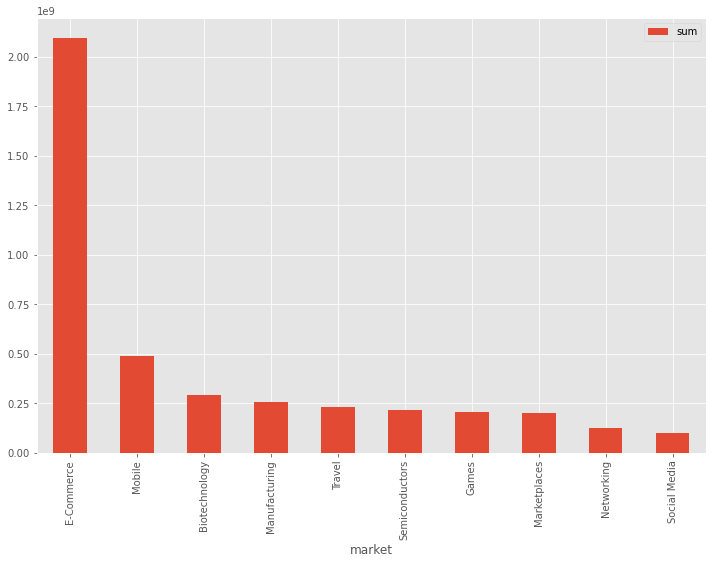

In [65]:
sea_dat_view.sort_values(by=['sum'],ascending=False).head(10).plot.bar(y='sum')

<AxesSubplot:xlabel='market'>

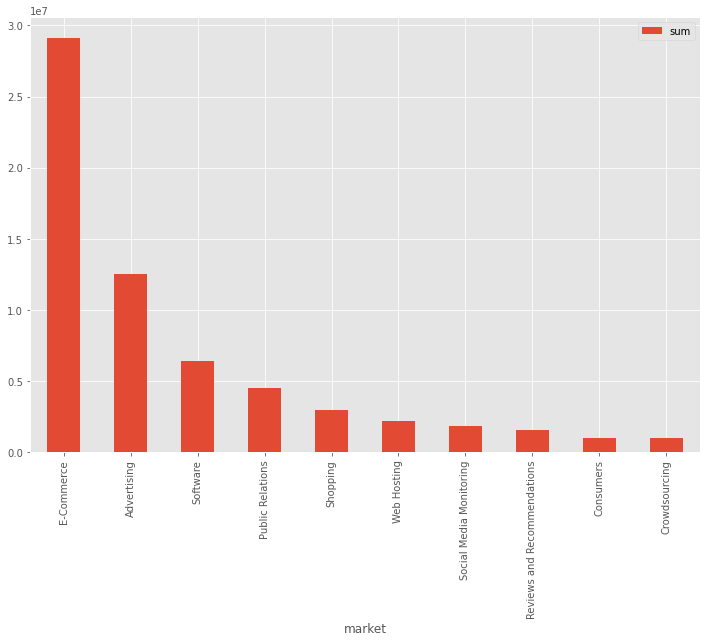

In [66]:
tha_dat_view.sort_values(by=['sum'],ascending=False).head(10).plot.bar(y='sum')

### THAILAND Startup Ranking

<AxesSubplot:xlabel='country'>

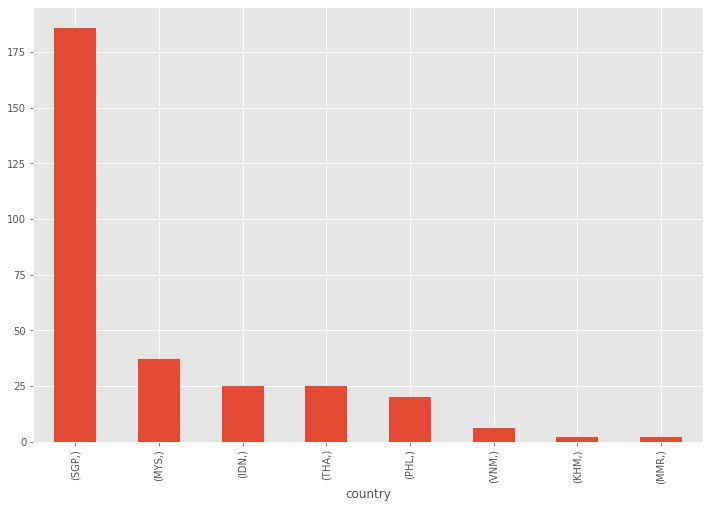

In [67]:
sea_com.value_counts().plot.bar()